* La idea es explorar la relación entre la población y la cantidad de establecimientos educativos por municipio en la Provincia de Buenos Aires.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Cargo los DataSets.

establecimientos = pd.read_csv("/home/julian/Escritorio/cvs_analisis_exploratorio/establecimientos-educativos-28042025.csv")
poblacion = pd.read_csv("/home/julian/Escritorio/cvs_analisis_exploratorio/proyecciones-poblacion-2010_2025.csv")
# Filtro solo lo necesario.

establecimientos = establecimientos[["municipio_id", "municipio_nombre", "establecimiento_id"]]
poblacion = poblacion[["municipio_id", "municipio_nombre", "2024"]]

# Elimino las filas de datos innecesarios
establecimientos = establecimientos.dropna()
poblacion = poblacion.dropna()

# Cuento cuántos establecimientos hay por municipio
escuelas_por_municipio = establecimientos.groupby("municipio_id").count().reset_index()
escuelas_por_municipio = escuelas_por_municipio[["municipio_id", "establecimiento_id"]]
escuelas_por_municipio = escuelas_por_municipio.rename(columns={"establecimiento_id": "cantidad_escuelas"})

# Renombramos la columna de población y unimos los datasets
poblacion = poblacion.rename(columns={"2024": "poblacion"})
df = pd.merge(poblacion, escuelas_por_municipio, on="municipio_id")

# Calculo habitantes por escuela
df["habitantes_por_escuela"] = df["poblacion"] / df["cantidad_escuelas"]

# Calculamos media, mediana y desvío estandar
print("Media de habitantes por escuela:", round(df["habitantes_por_escuela"].mean(), 2))
print("Mediana:", round(df["habitantes_por_escuela"].median(), 2))
print("Desvío estándar:", round(df["habitantes_por_escuela"].std(), 2))

# Histograma
plt.figure(figsize=(12, 6))
plt.hist(df["habitantes_por_escuela"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribución de habitantes por escuela (2024)")
plt.xlabel("Habitantes por escuela")
plt.ylabel("Cantidad de municipios")
plt.grid(True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/juliacvs_analisis_exploratorio/establecimientos-educativos-28042025.csv'

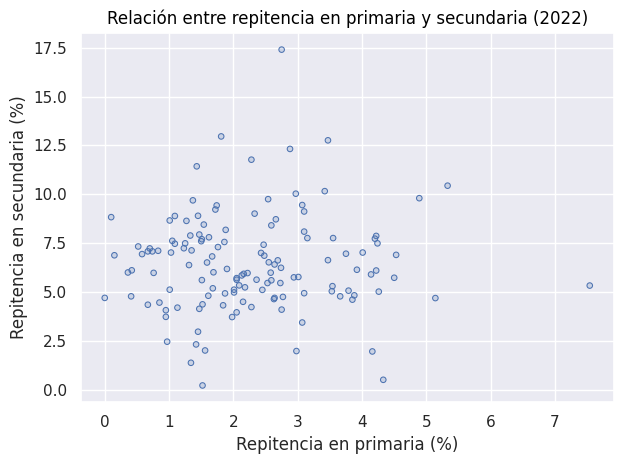

Repitencia en primaria:
Media: 2.2779999999999996
Mediana: 2.09
Desvío estándar: 1.2542089140171186
Repitencia en secundaria:
Media: 6.457407407407407
Mediana: 6.14
Desvío estándar: 2.4821746492736887


In [ ]:
import pandas as pd
import seaborn.objects as so

# Cargo los datos con encoding compatible
repitencia = pd.read_csv("/home/julian/Escritorio/cvs_analisis_exploratorio/indicadores-proceso-trayectoria-sobreedad-2012_2022.csv",
                         encoding="latin1")

# Filtrar año 2022
repitencia_2022 = repitencia[repitencia["anio"] == 2022]

# Gráfico con seaborn.objects
grafico = (
    so.Plot(repitencia_2022, x="repitencia_primaria", y="repitencia_secundaria")
    .add(so.Dots())
    .label(x="Repitencia en primaria (%)",
           y="Repitencia en secundaria (%)",
           title="Relación entre repitencia en primaria y secundaria (2022)"))

grafico.show()

print("Repitencia en primaria:")
print("Media:", repitencia_2022["repitencia_primaria"].mean())
print("Mediana:", repitencia_2022["repitencia_primaria"].median())
print("Desvío estándar:", repitencia_2022["repitencia_primaria"].std())

print("Repitencia en secundaria:")
print("Media:", repitencia_2022["repitencia_secundaria"].mean())
print("Mediana:", repitencia_2022["repitencia_secundaria"].median())
print("Desvío estándar:", repitencia_2022["repitencia_secundaria"].std())




Index(['municipio_id', 'municipio_nombre', 'poblacion', 'cantidad_escuelas',
       'habitantes_por_escuela', 'repitencia_primaria_x',
       'repitencia_primaria_y', 'repitencia_primaria',
       'repitencia_secundaria'],
      dtype='object')


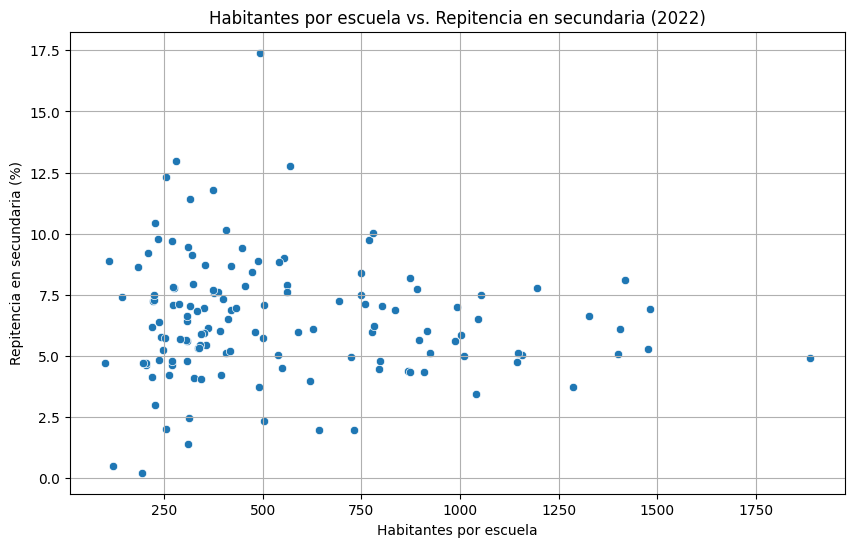

Estadísticas descriptivas de repitencia en secundaria:
Media: 6.457407407407407
Mediana: 6.14
Desvío estándar: 2.4821746492736887

Estadísticas de habitantes por escuela:
Media: 547.7627624764327
Mediana: 406.7202380952381
Desvío estándar: 354.63465050751023


,municipio_id,poblacion,cantidad_escuelas,habitantes_por_escuela,repitencia_primaria_x,repitencia_primaria_y,repitencia_primaria,repitencia_secundaria
count,135.000000,1.350000e+02,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,6447.851852,1.348211e+05,160.081481,547.762762,2.278000,2.278000,2.278000,6.457407
std,250.584020,2.662040e+05,186.629454,354.634651,1.254209,1.254209,1.254209,2.482175
min,6007.000000,1.816000e+03,15.000000,100.344828,0.000000,0.000000,0.000000,0.220000
25%,6241.500000,1.720350e+04,58.000000,288.770943,1.425000,1.425000,1.425000,4.935000
50%,6448.000000,3.817200e+04,87.000000,406.720238,2.090000,2.090000,2.090000,6.140000
75%,6656.500000,1.203455e+05,175.000000,773.714193,2.995000,2.995000,2.995000,7.715000
max,6882.000000,2.464843e+06,1306.000000,1887.322358,7.540000,7.540000,7.540000,17.400000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciono solo las columnas necesarias de repitencia_2022
repitencia_reducido = repitencia_2022[["municipio_id", "repitencia_secundaria"]]

# Uno los datos de población y escuelas con los de repitencia
df_total = pd.merge(df, repitencia_reducido, on="municipio_id")

# Verifico qué columnas tenemos disponibles
print(df_total.columns)

# Gráfico: Habitantes por escuela vs. Repitencia en secundaria
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_total, x="habitantes_por_escuela", y="repitencia_secundaria")
plt.title("Habitantes por escuela vs. Repitencia en secundaria (2022)")
plt.xlabel("Habitantes por escuela")
plt.ylabel("Repitencia en secundaria (%)")
plt.grid(True)
plt.show()

print("Estadísticas descriptivas de repitencia en secundaria:")
print("Media:", df_total["repitencia_secundaria"].mean())
print("Mediana:", df_total["repitencia_secundaria"].median())
print("Desvío estándar:", df_total["repitencia_secundaria"].std())

print("\nEstadísticas de habitantes por escuela:")
print("Media:", df_total["habitantes_por_escuela"].mean())
print("Mediana:", df_total["habitantes_por_escuela"].median())
print("Desvío estándar:", df_total["habitantes_por_escuela"].std())

df_total.describe()

